# Show issue with quasar declinations in CoLoRe

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp

In [3]:
#Open data file (test file with few quasars)
#hdulist = fits.open('/Users/font/Projects/DESI/desi_lya_mocks/Sims/NERSC_Lya4096/test_skewers_4096_gaussian_srcs_s0_0.fits')
hdulist = fits.open('../example_data/raw_colore/test_bad_dec.fits')
catalog = hdulist[1].data
print('input catalog size',len(catalog))

input catalog size 1000


In [4]:
ra=catalog['RA']
dec=catalog['DEC']
print(np.min(ra),'< RA <',np.max(ra))
print(np.min(dec),'< Dec <',np.max(dec))

0.0356661 < RA < 359.887
nan < Dec < nan


In [5]:
nan_dec = np.isnan(dec)
bad_quasars = catalog[nan_dec]
print('# NaN dec',len(bad_quasars))

# NaN dec 7


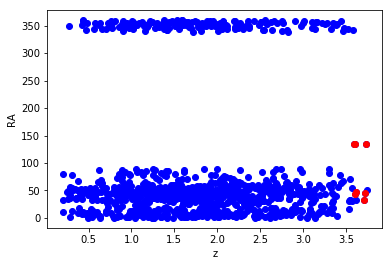

In [6]:
# figure out what is common in all these files
plt.plot(catalog['Z_COSMO'],catalog['RA'],'bo')
plt.plot(bad_quasars['Z_COSMO'],bad_quasars['RA'],'ro')
plt.xlabel('z')
plt.ylabel('RA')

In [7]:
# all problematic quasars are at z > 3.55
zq_catalog=catalog['Z_COSMO']
zq_bad=bad_quasars['Z_COSMO']
Ntotal=len(catalog[zq_catalog>3.55])
Nbad=len(bad_quasars[zq_bad>3.55])
print('# of high-z quasars',Ntotal)
print('# of high-z quasars with bad Dec',Nbad)

# of high-z quasars 14
# of high-z quasars with bad Dec 7
